# Business Case:Porter-NN_Regression

- Porter is India's largest marketplace for intra-city logistics, leading the country's $40 billion intra-city logistics market. With a vast network of 1,50,000+ driver-partners, Porter aims to provide seamless and efficient delivery services while ensuring stable earnings and independence for its partners. The company has successfully catered to 5+ million customers by offering logistics solutions for various sectors, including restaurant food delivery.

- To enhance customer experience, Porter collaborates with multiple restaurants to deliver food directly to customers. Efficient and accurate delivery time estimation is crucial for ensuring customer satisfaction, optimizing delivery operations, and improving resource allocation.

### Objective:
The objective of this project is to develop a regression model that can accurately estimate food delivery time based on key factors such as:

- Order details (food items ordered)
- Restaurant location
- Delivery partner availability and attributes
- Traffic and distance-related factors

## Dataset Information:

#### Dataset: "[Porter.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/039/original/dataset.csv.zip?1663710760)"

#### Feature Information:
- **market_id :** integer id for the market where the restaurant lies
- **created_at :** the timestamp at which the order was placed
- **actual_delivery_time :** the timestamp when the order was delivered
- **store_primary_category :** category for the restaurant
- **order_protocol :** integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
- **total_items subtotal :** final price of the order
- **num_distinct_items :** the number of distinct items in the order
- **min_item_price :** price of the cheapest item in the order
- **max_item_price :** price of the costliest item in order
- **total_onshift_partners :** number of delivery partners on duty at the time order was placed
- **total_busy_partners :** number of delivery partners attending to other tasks
- **total_outstanding_orders :** total number of orders to be fulfilled at the moment

## Loading the "Porter.csv" Dataset:
For exploring and analysing and building model first we import the Python libraries like numpy,pandas,matplotlib,Seaborn,scikit-learn,tensorflow, keras and then import the "Porter.csv" dataset and save it in a dataframe "df".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, TargetEncoder


# Randomforest
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# ANN training
import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU

from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError

from keras.metrics import mean_absolute_percentage_error
from keras.metrics import RootMeanSquaredError
from keras.metrics import MeanAbsoluteError
from keras.optimizers import SGD, Adam

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\SCALER\Business Case\Case Study-13(Neural Network)\Porter.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,06-02-2015 22:24,06-02-2015 23:27,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,10-02-2015 21:49,10-02-2015 22:56,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,22-01-2015 20:39,22-01-2015 21:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,03-02-2015 21:21,03-02-2015 22:13,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,15-02-2015 02:40,15-02-2015 03:20,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


# 1. Basic Exploration of Data

In [3]:
# getting the shape of the dataframe

df.shape

(197428, 14)

In [4]:
# getting the columns of the dataframe

df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

In [5]:
# getting the data types of the dataframe

df.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object

In [6]:
# Converting the dtype of columns 'created_at' and 'actual_delivery_time' to datatime

correct_format = "%d-%m-%Y %H:%M"

df['created_at'] = pd.to_datetime(df['created_at'], format=correct_format, errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], format=correct_format, errors='coerce')

In [7]:
# Calculating Time Taken for Delivery which is the target column in our dataframe df

df['time_taken'] = df['actual_delivery_time'] - df['created_at']
df['time_taken_mins'] = pd.to_timedelta(df['time_taken'])/pd.Timedelta('60s')

In [8]:
# Extracting hour and day of week from the column 'created_at'

df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

In [9]:
# getting the number of unique values in each column

df.nunique()

market_id                       6
created_at                  23636
actual_delivery_time        23756
store_id                     6743
store_primary_category         74
order_protocol                  7
total_items                    57
subtotal                     8368
num_distinct_items             20
min_item_price               2312
max_item_price               2652
total_onshift_partners        172
total_busy_partners           159
total_outstanding_orders      281
time_taken                    273
time_taken_mins               273
hour                           19
day                             7
dtype: int64

In [10]:
df.head(3)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken,time_taken_mins,hour,day
0,1.0,2015-02-06 22:24:00,2015-02-06 23:27:00,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:03:00,63.0,22,4
1,2.0,2015-02-10 21:49:00,2015-02-10 22:56:00,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:00,67.0,21,1
2,3.0,2015-01-22 20:39:00,2015-01-22 21:09:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:30:00,30.0,20,3


In [11]:
# Checking for duplicate records

df.duplicated().sum()

np.int64(0)

- There is no duplicate rows in the dataframe.

In [12]:
df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
time_taken                      7
time_taken_mins                 7
hour                            0
day                             0
dtype: int64

- We can clearly see, there are a lot of missing values in some columns. We will treat them later.

# 2. Exploratory Data Analysis

## 2.1 Statistical Summary:

In [13]:
num_cols = ['total_items' , 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price' , 'total_onshift_partners', 
            'total_busy_partners' , 'total_outstanding_orders']
cat_cols = ['market_id', 'store_id','order_protocol',  'store_primary_category', 'hour', 'day']
target = 'time_taken_mins'

In [14]:
for col in cat_cols:
    df['col'] = df[col].astype('str')

In [15]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
market_id,196441.0,2.978706,1.0,2.0,3.0,4.0,6.0,1.524867
created_at,197428,2015-02-04 21:59:39.960592896,2014-10-19 05:24:00,2015-01-29 02:32:00,2015-02-05 03:29:00,2015-02-12 01:39:00,2015-02-18 06:00:00,NaN
actual_delivery_time,197421,2015-02-04 22:47:53.919795712,2015-01-21 15:58:00,2015-01-29 03:22:00,2015-02-05 04:40:00,2015-02-12 02:25:00,2015-02-19 22:45:00,NaN
order_protocol,196433.0,2.882352,1.0,1.0,3.0,4.0,7.0,1.503771
total_items,197428.0,3.196391,1.0,2.0,3.0,4.0,411.0,2.666546
subtotal,197428.0,2682.331402,0.0,1400.0,2200.0,3395.0,27100.0,1823.093688
num_distinct_items,197428.0,2.670791,1.0,1.0,2.0,3.0,20.0,1.630255
min_item_price,197428.0,686.21847,-86.0,299.0,595.0,949.0,14700.0,522.038648
max_item_price,197428.0,1159.58863,0.0,800.0,1095.0,1395.0,14700.0,558.411377
total_onshift_partners,181166.0,44.808093,-4.0,17.0,37.0,65.0,171.0,34.526783


- The average order subtotal is 2682.33 with a large standard deviation (1823.09), suggesting a wide range of order values. The maximum subtotal is 27,100, which is significantly higher than the 75th percentile (3,395), **indicating potential outliers.**
- Minimum value is -86, which is likely an error or incorrectly recorded data. The median price is 595, with most items priced between 299 (25th percentile) and 949 (75th percentile).
- Some values are negative (e.g., -4, -5, -6), which might indicate incorrect data or a unique encoding. The mean number of on-shift partners is 44.88, while busy partners are slightly lower at 41.73.
- The average delivery time is 48.47 mins, but the max is 141,947 mins (~98 days!), indicating extreme outliers. The median is 44 mins, suggesting that the **majority of deliveries are completed in under an hour.**

In [16]:
# dropping the columns 'created_at', 'actual_delivery_time', 'time_taken' that no longer needed

df = df.drop(['created_at', 'actual_delivery_time', 'time_taken'], axis=1)

In [17]:
# df.head()

## 2.2 Data Visualization:

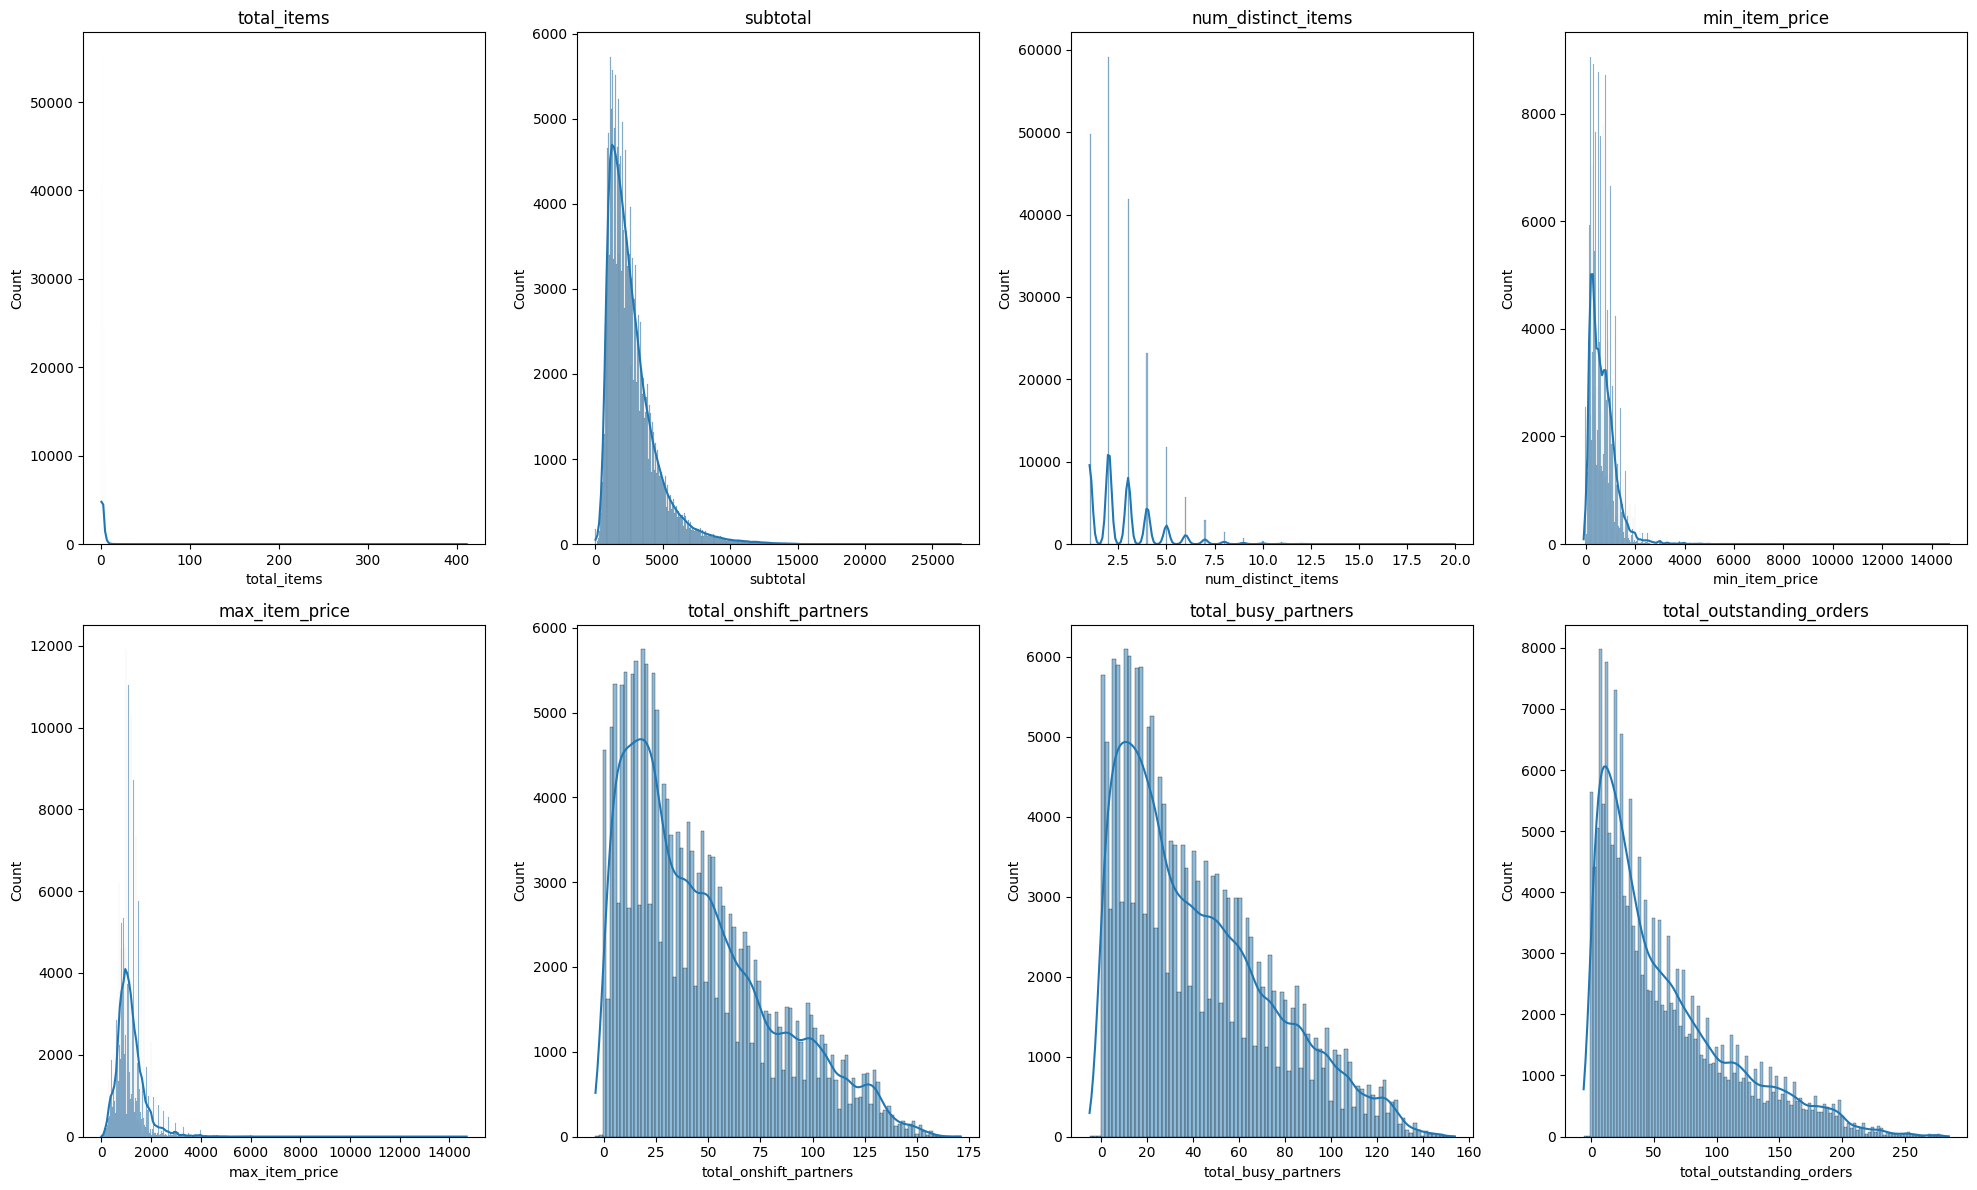

In [18]:
# check distribution of each numerical variable

rows, cols = 2, 4  # 2 rows, 4 columns
fig, axis = plt.subplots(rows, cols, figsize=(20, 12))

index = 0
for row in range(rows):
    for col in range(cols):
        if index < len(num_cols):  # Check index bounds
            sns.histplot(df[num_cols[index]], kde=True, ax=axis[row, col])
            axis[row, col].set_title(num_cols[index])
        else:
            axis[row, col].axis("off")  # Hide empty subplots if num_cols is smaller than the grid
        index += 1

plt.tight_layout()
plt.show()

- **Highly Positively Skewed: subtotal, min_item_price, max_item_price, total_items**
    - Most values are concentrated towards the lower end, with a few extreme values (outliers).
    - Suggests that the majority of transactions have low values, but some have very high values (potential anomalies).
    
- **Total Items & Distinct Items:**
    - total_items: Most orders contain very few items, with a sharp drop-off beyond a certain number.
    - num_distinct_items: A similar pattern; most orders contain only a few distinct items.
    - Implies that customers generally order small numbers of unique items.
    
- Partner Availability:
    - total_onshift_partners and total_busy_partners: Show a right-skewed pattern.
- **Total Outstanding Orders:**
    - Right-skewed, meaning most times there are relatively few outstanding orders, but occasionally there are spikes.
    - This could indicate rush hours where many orders pile up.

In [19]:
# check unique values in categorical variables

for col in cat_cols:
    print("Column: {} Unique values: {}".format(col, df[col].nunique()))

Column: market_id Unique values: 6
Column: store_id Unique values: 6743
Column: order_protocol Unique values: 7
Column: store_primary_category Unique values: 74
Column: hour Unique values: 19
Column: day Unique values: 7


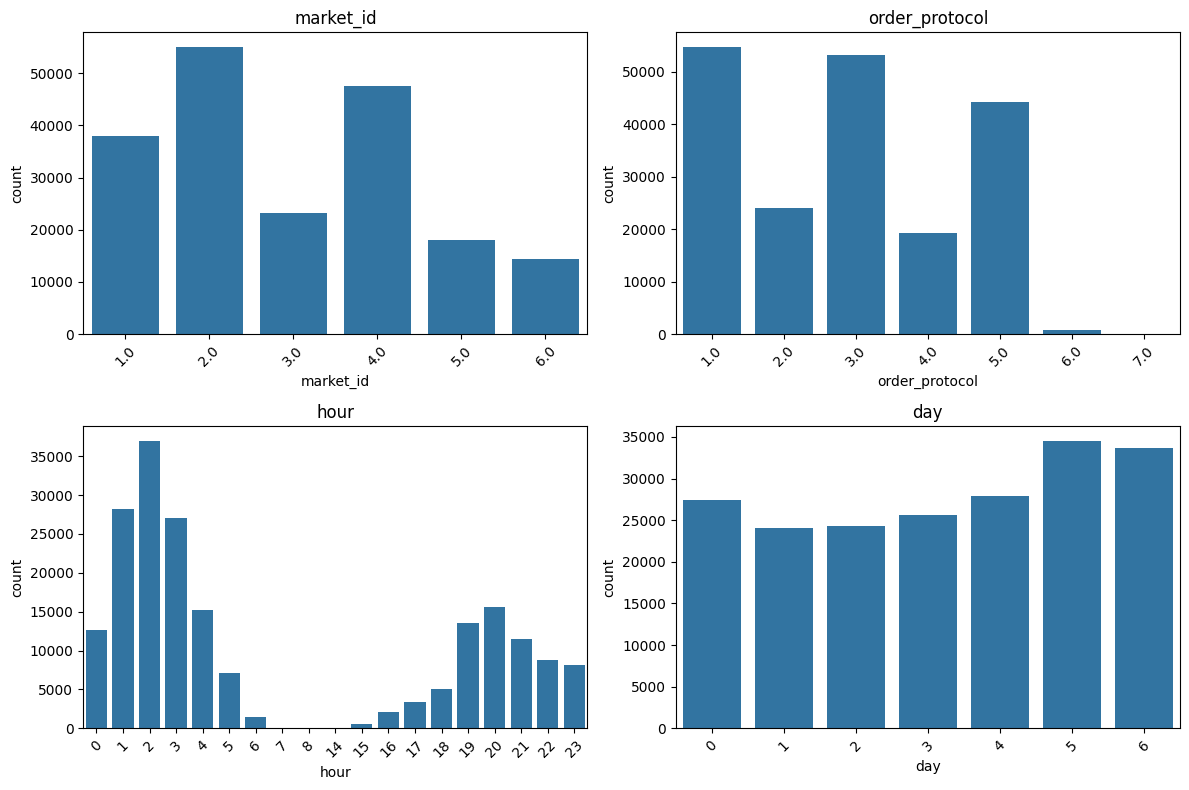

In [20]:
cols = ['market_id', 'order_protocol', 'hour', 'day']

plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

- Market Distribution:
    - Market 2 and Market 4 have the highest order counts.
    - Market 5 and Market 6 have significantly fewer orders.
    - **This suggests that demand is higher in certain markets, which might be due to location, population, or service efficiency.**
- Order Protocol:
    - Protocols 1, 3 and 5 are the most frequently used.
    - Protocols 6 and 7 have almost negligible usage.
    - **Certain order protocols are preferred, possibly due to ease of use or company policies.**
- Order Distribution by Hour:
    - The peak order volume is between 12 AM to 4 AM, with the highest at 2 AM.
    - There is a sharp drop from 5 AM to 5 PM.
    - Orders start picking up again in the evening, peaking around 8-10 PM.
    - **This suggests late-night demand is very high, likely for food or essential services.**
- Order Distribution by Day:
    - Orders are evenly distributed across the week.
    - However, Friday and Saturday see the highest volume, possibly due to weekend demand.
    - Monday to Thursday have relatively stable but lower order counts.

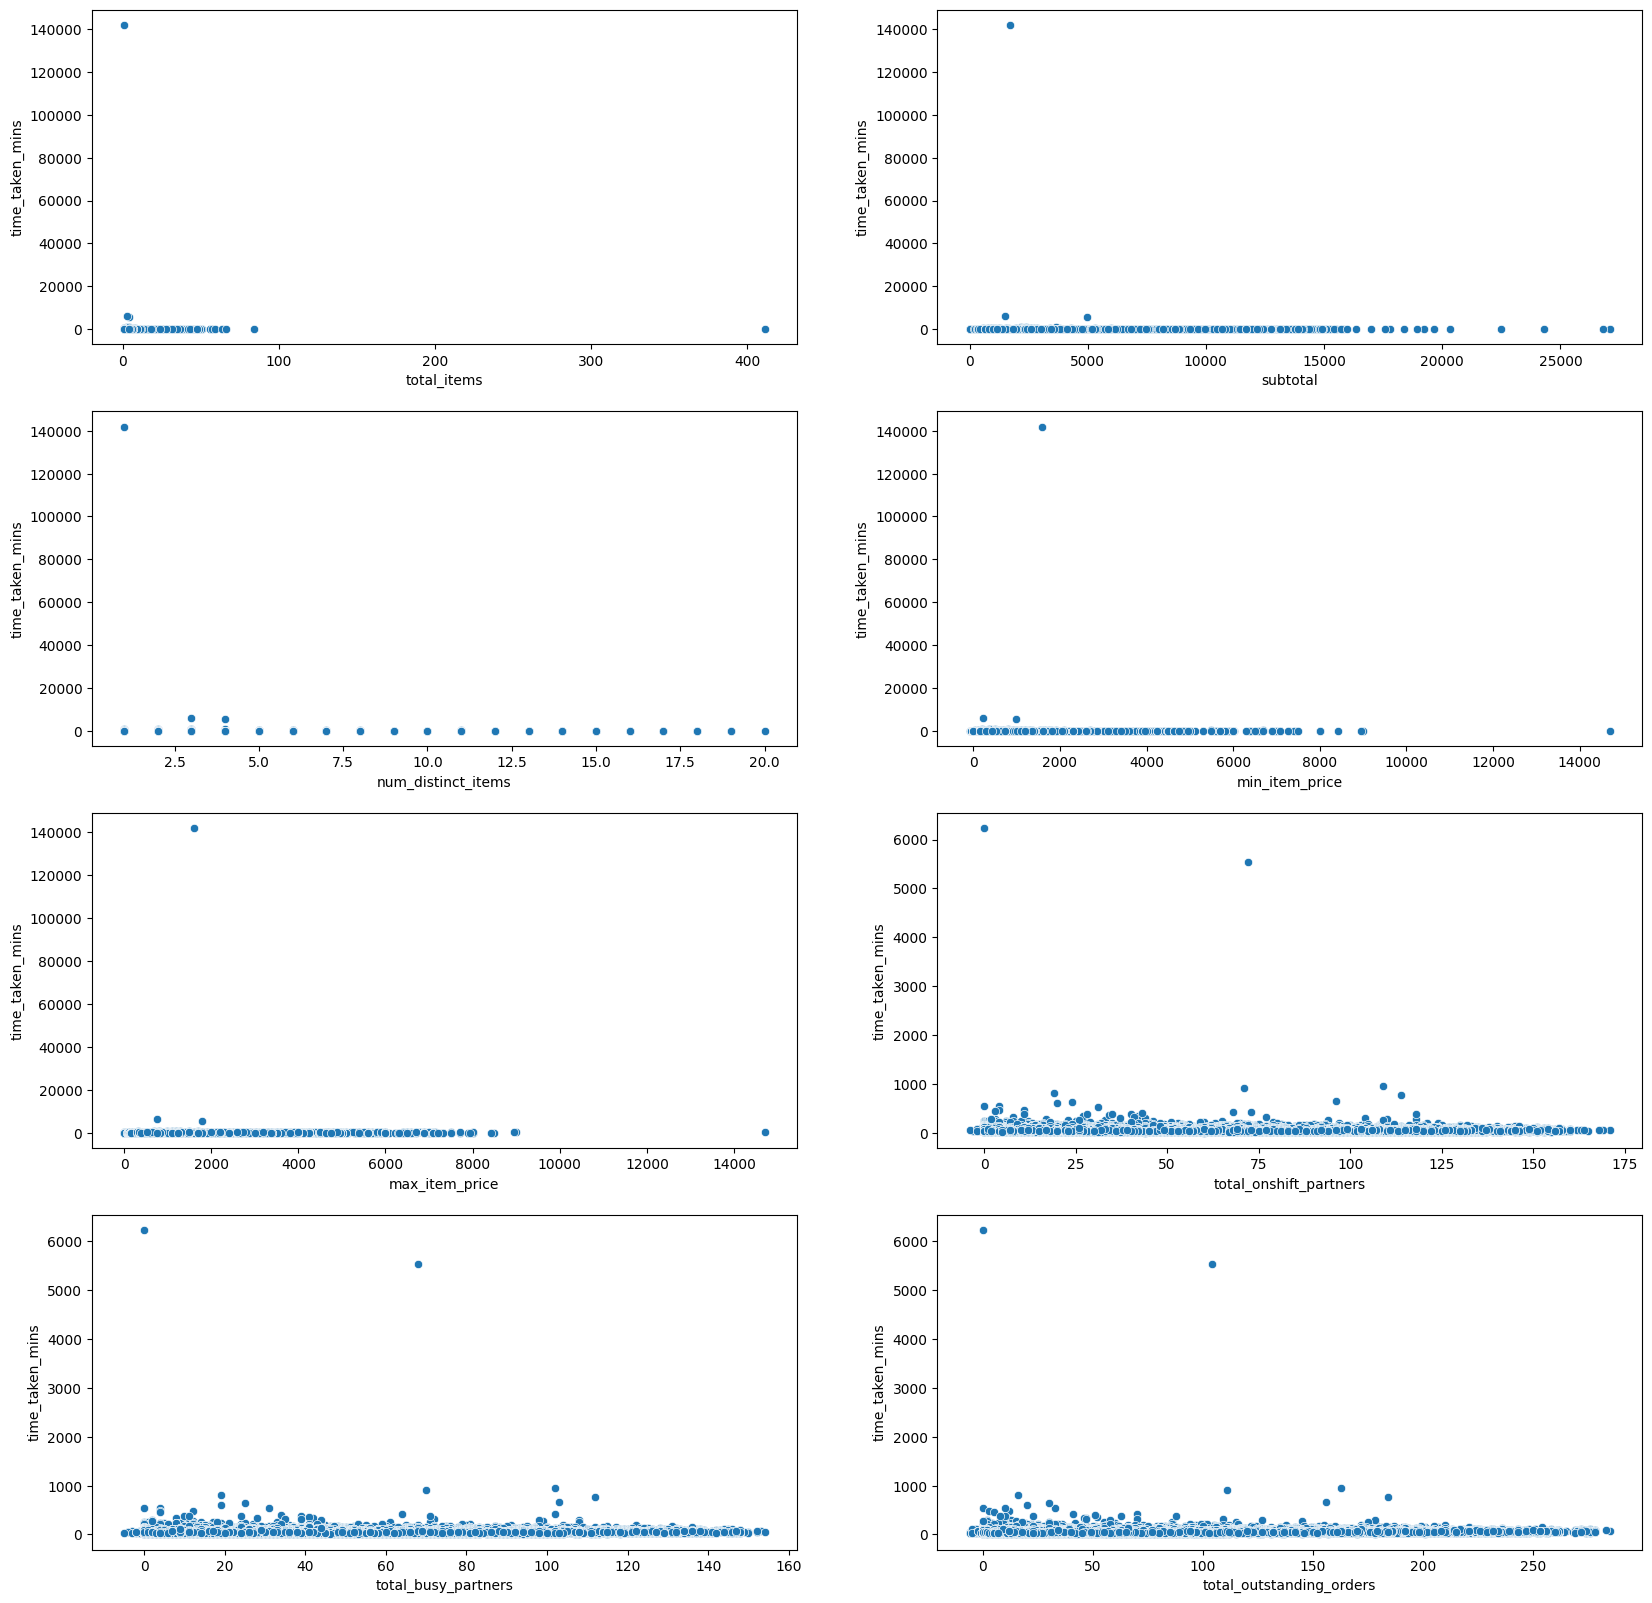

In [21]:
# check distribution of each numerical variable

rows, cols = 4, 2
fig, ax = plt.subplots(rows,cols, figsize=(20, 20))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.scatterplot(x=num_cols[index], y=target, data=df, ax=ax[row, col])
        index += 1
        
plt.show()

- There are **extreme outliers** for time_taken_mins, exceeding 140,000 minutes.
- Some points in total_items, subtotal, and max_item_price deviate significantly from the general trend.
- Many scatter plots show a clustered trend at lower values, with a few extreme points deviating, indicating **non-linear relationships.**

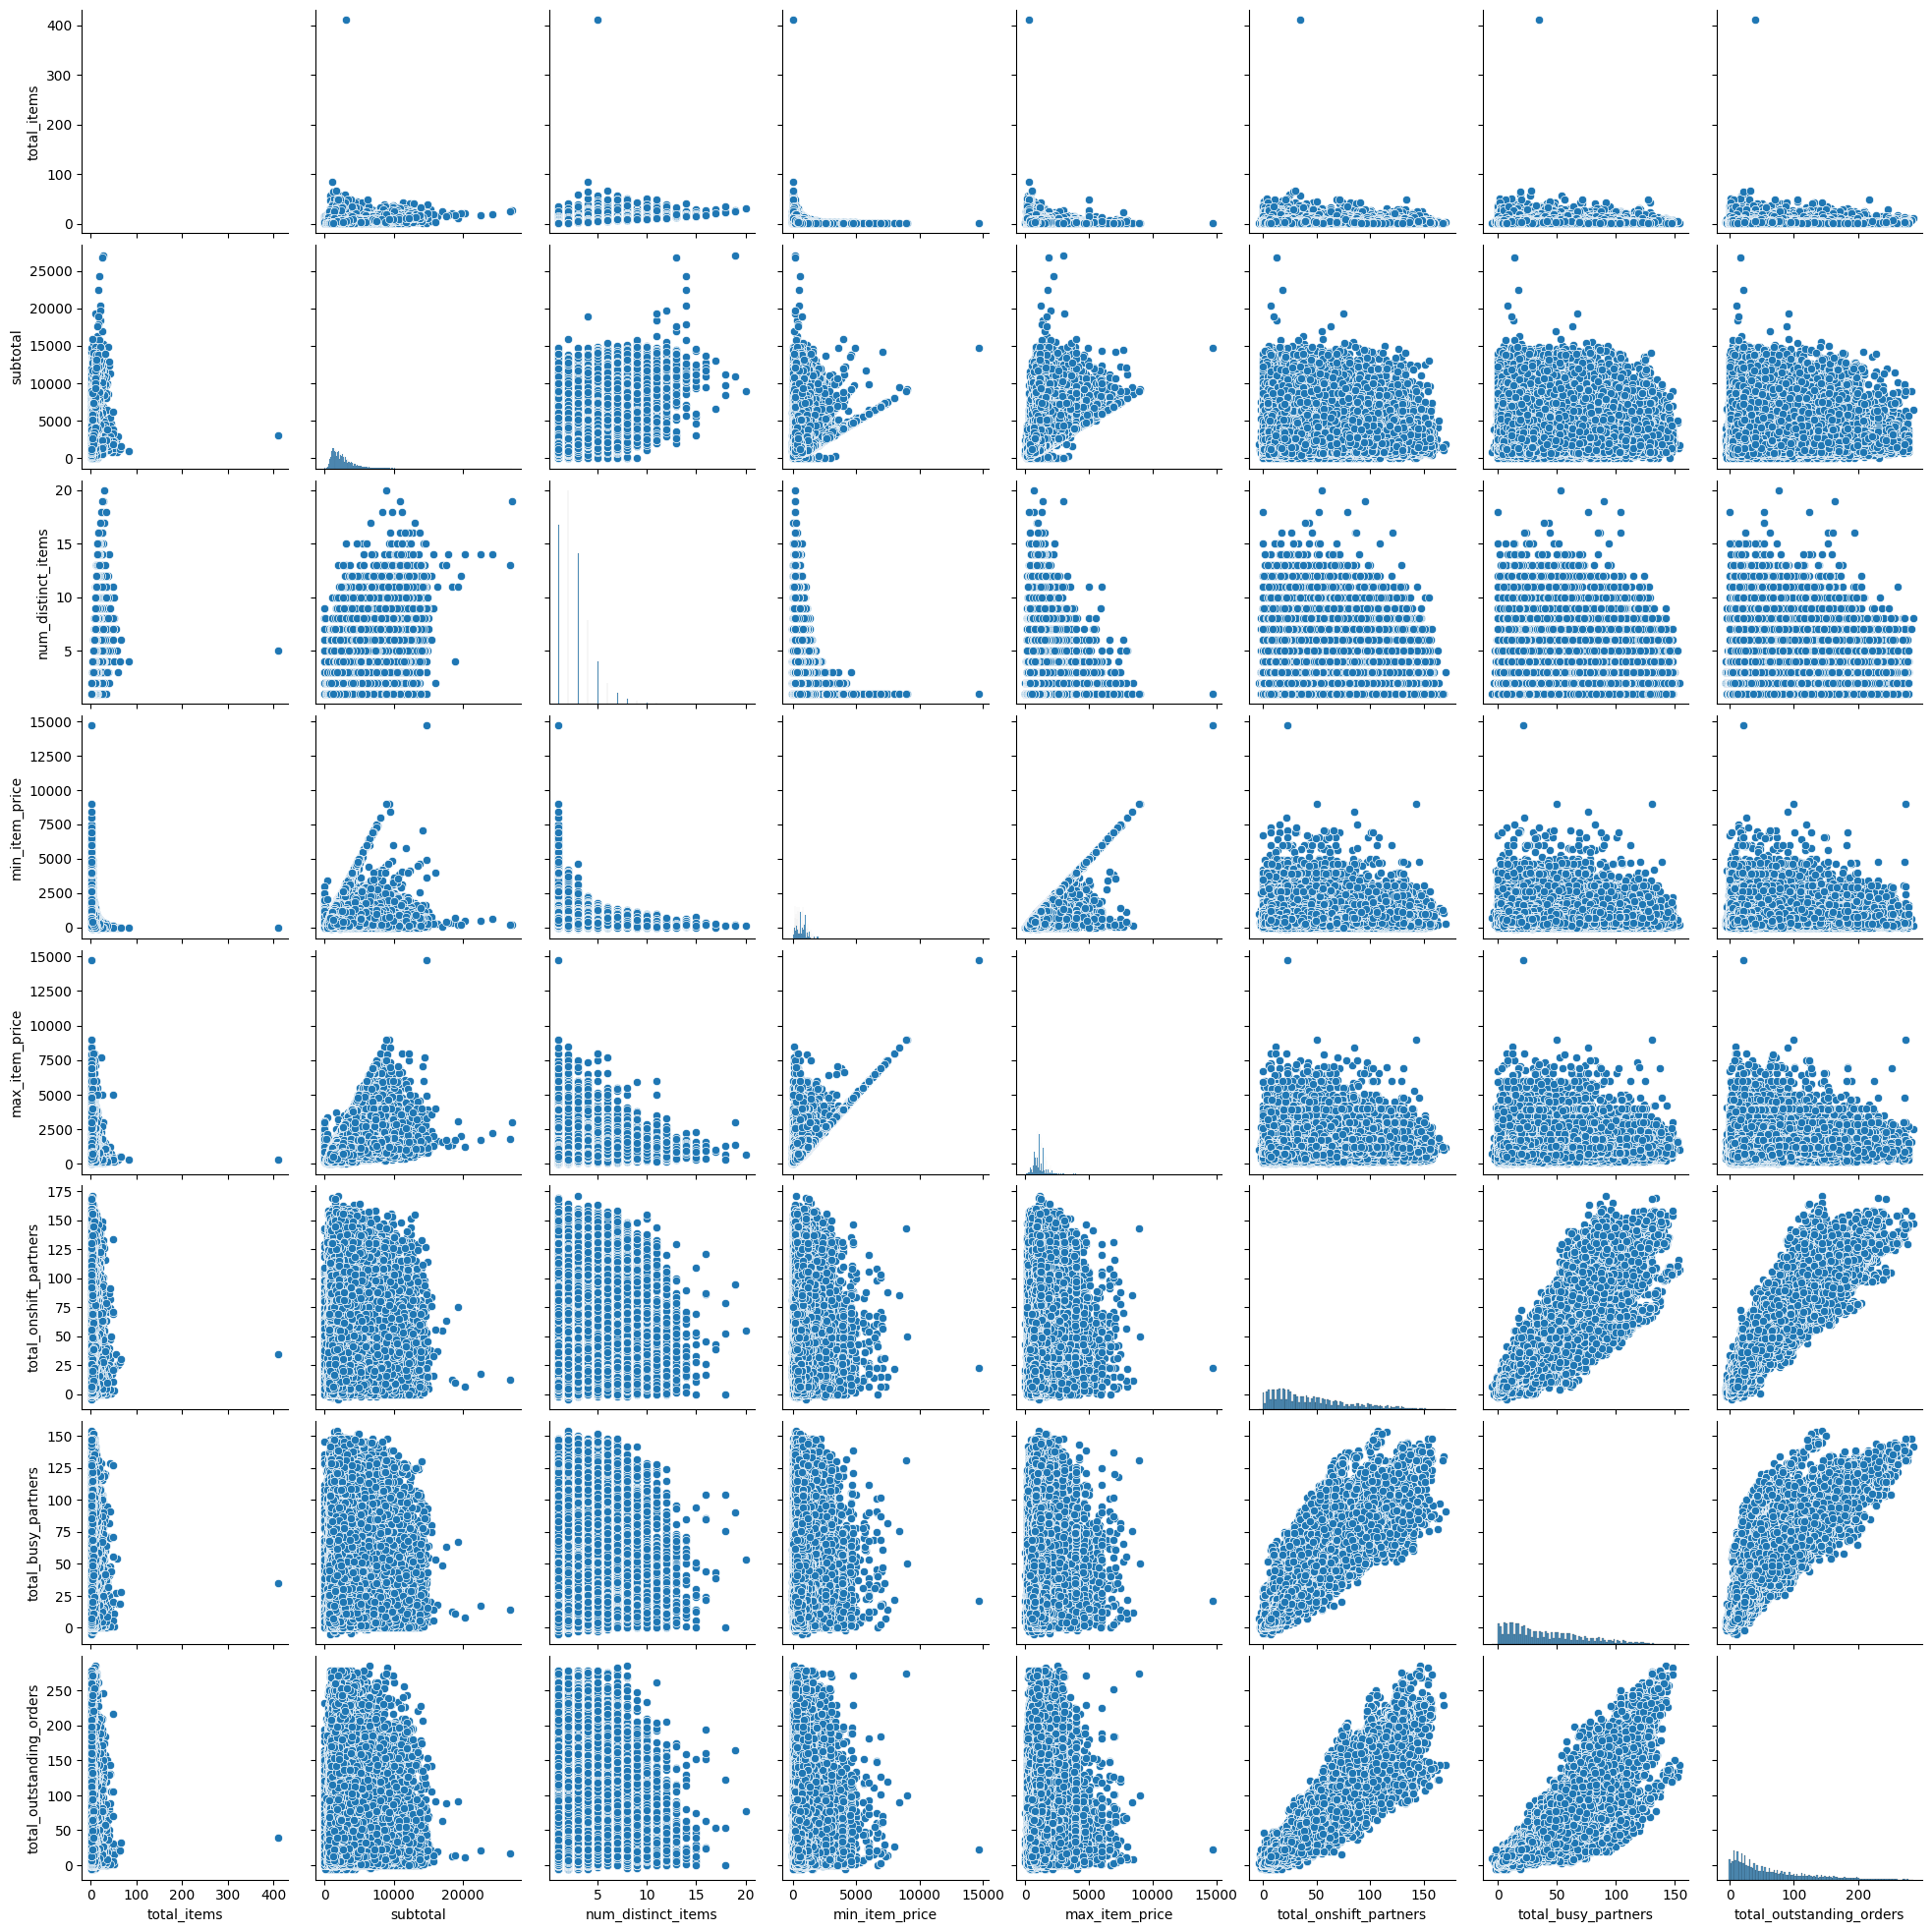

In [22]:
# Pairplot

sns.pairplot(df[num_cols])
plt.show()

- **Strong positive correlations:**
    - total_onshift_partners vs. total_busy_partners
    - total_busy_partners vs. total_outstanding_orders
    - total_onshift_partners vs. total_outstanding_orders
    
- **Weak or no clear correlation:**
    - subtotal vs. total_onshift_partners
    - num_distinct_items vs. total_busy_partners

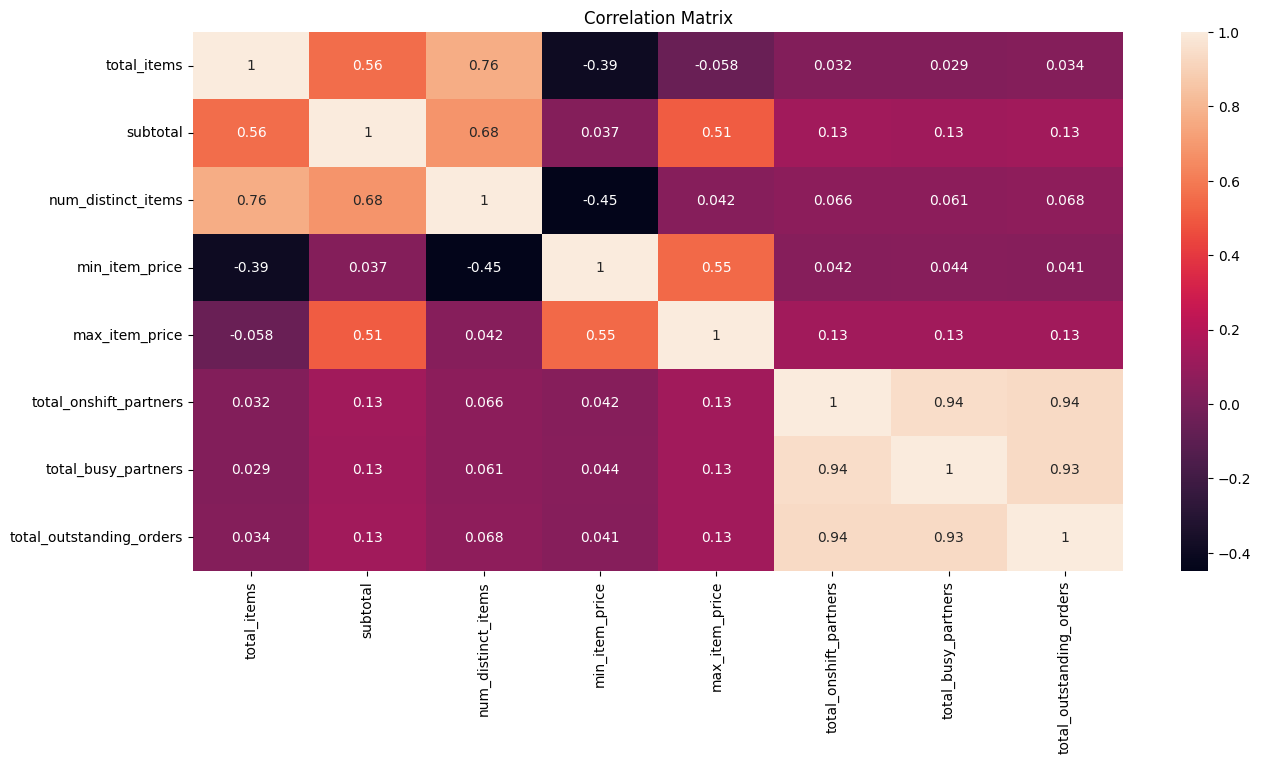

In [23]:
# Heatmap

plt.figure(figsize=(15, 7))

corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

- **Strong Positive Correlations:**
    - total_onshift_partners vs. total_busy_partners (0.94)
    (More partners on shift means more of them are actively busy.)
    - total_onshift_partners vs. total_outstanding_orders (0.94)
    (As the number of available partners increases, outstanding orders also increase.)
    - total_busy_partners vs. total_outstanding_orders (0.93)
    (More busy partners indicate higher demand and more pending orders.)

- **Moderate Positive Correlations:**
    - total_items vs. subtotal (0.56)
    (More items in an order generally lead to a higher subtotal, but other factors (like item price variations) influence the final amount.)
    - num_distinct_items vs. subtotal (0.68)
    (Having a greater variety of distinct items also increases the total order value.)
    - max_item_price vs. subtotal (0.51)
    (Orders with higher-priced items contribute significantly to the total order value.)
    
- Weak or No Correlation
    - total_items vs. total_onshift_partners (~0.03)
    - total_items vs. total_busy_partners (~0.02)
    - total_items vs. total_outstanding_orders (~0.03)

### Insights & Recommendations:

- Most customers buy a small number of items, so marketing strategies can focus on increasing cart size.
- Optimize resources in high-demand markets (Market 2 & 4).
- Ensure staffing during peak hours (late night & evening).
- Understand order protocol efficiency to improve user experience.
- Weekend marketing & promotions could be beneficial, given the high volume of orders.
- High partner availability leads to more busy partners and outstanding orders, so workforce planning should consider peak times.
- Subtotal and max/min item prices exhibit skewness, suggesting price variability across orders.
- Outliers need further investigation to determine if they represent errors, special cases, or high-value transactions.
- No strong correlation between total items and number of partners, suggesting fulfillment capacity is not directly affected by item volume.
- These three variables (total_onshift_partners, total_busy_partners, and total_outstanding_orders) are highly interconnected, meaning that workforce planning should consider fluctuations in outstanding orders.
- Revenue is driven by both the number of items and item pricing. Businesses should focus on encouraging customers to purchase a variety of distinct items or higher-priced products.

# 2.3 Data Preprocessing:

### 2.3.1 Treatment for Missing values:

In [24]:
# Checking for missing values

df.isnull().sum()

market_id                     987
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
time_taken_mins                 7
hour                            0
day                             0
col                             0
dtype: int64

In [25]:
# Getting the percentage of missing values

(df.isnull().sum()/len(df))*100

market_id                   0.499929
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
time_taken_mins             0.003546
hour                        0.000000
day                         0.000000
col                         0.000000
dtype: float64

total number of obseration is: 197428


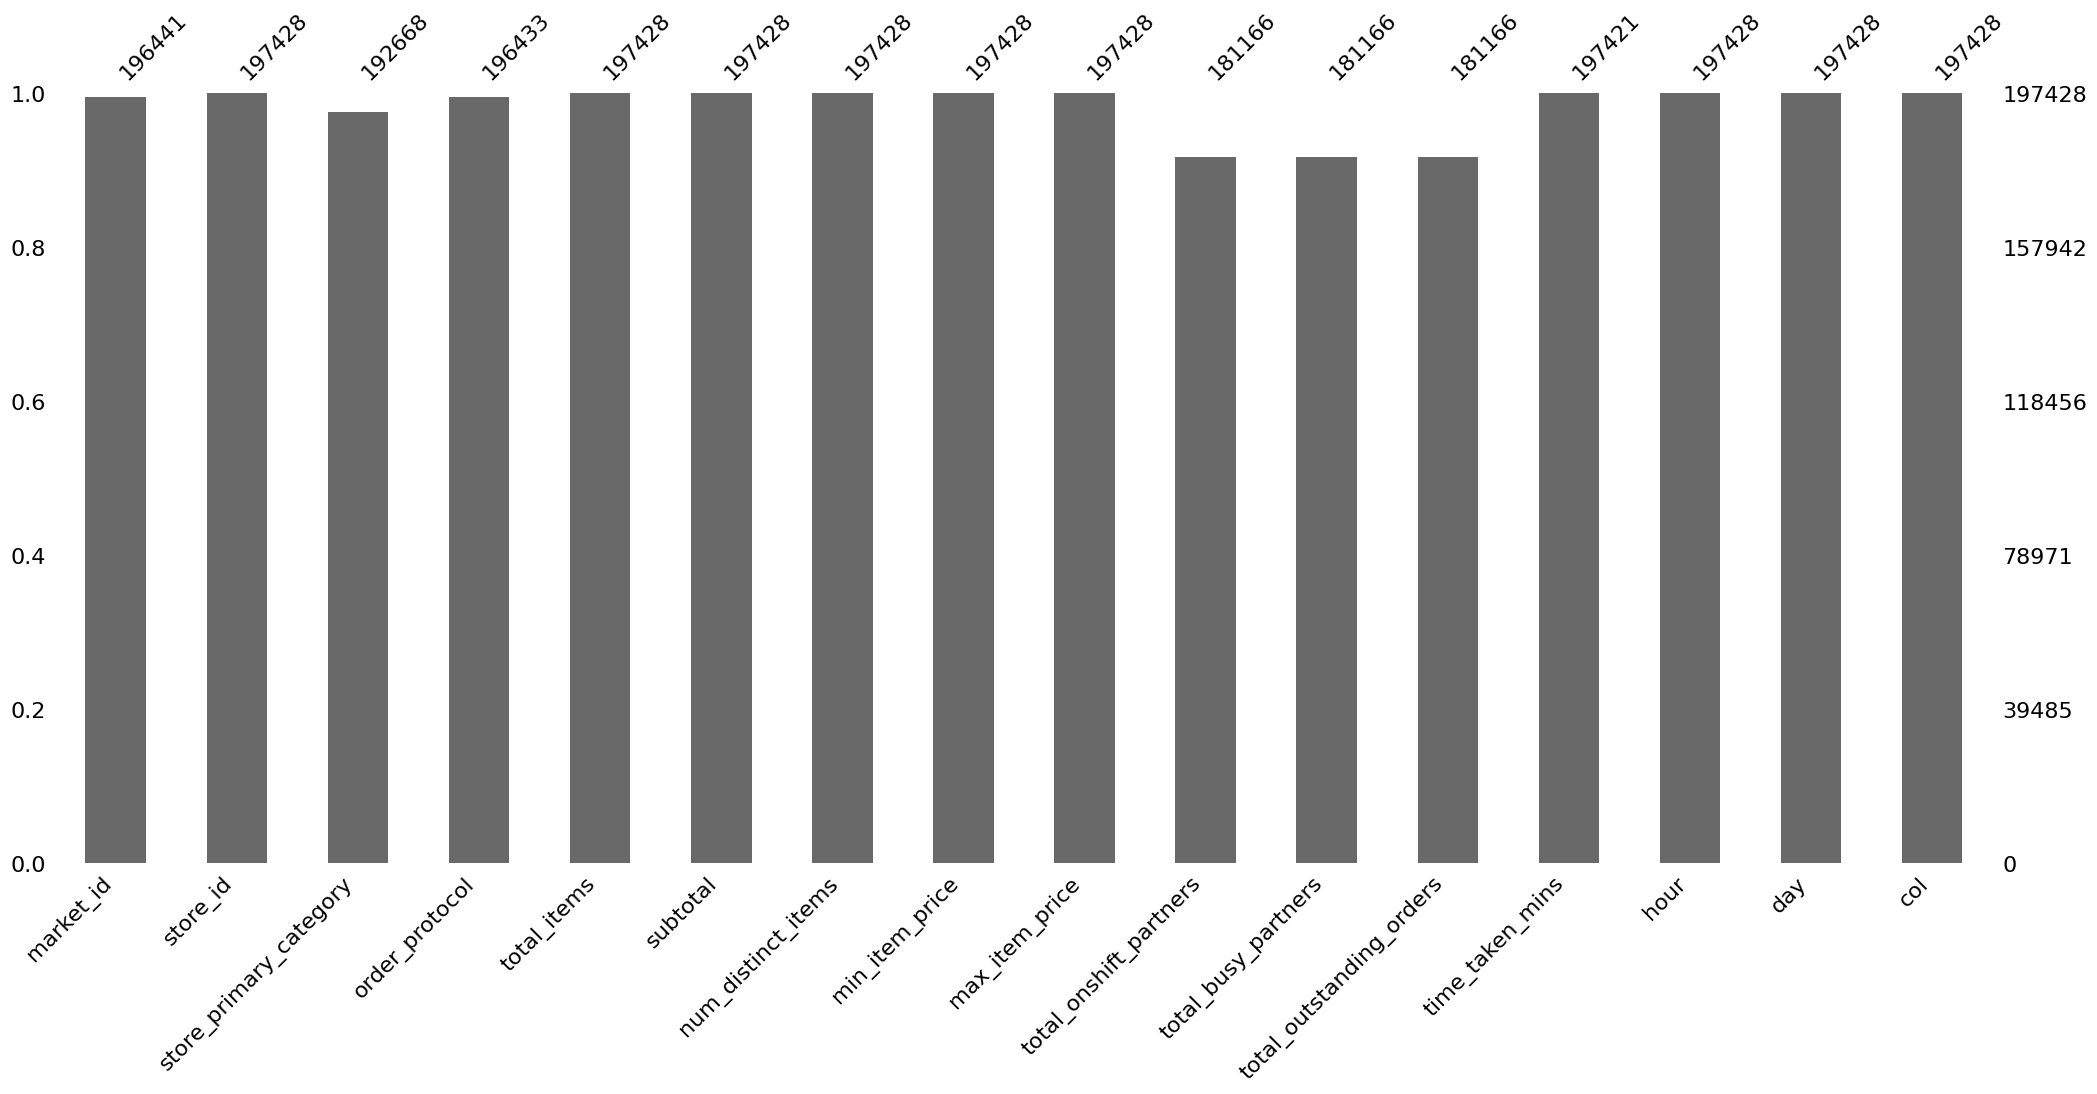

In [26]:
print ('total number of obseration is:',df.shape[0])

msno.bar(df)
plt.show()

- The missing values in every column is less than 0.5% and our dataset is large. So we can now drop the records with missing values.

In [27]:
df = df.dropna()

### 2.3.2 Outlier Detection & Treatment:

In [28]:
num_cols = ['total_items' , 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price' , 'total_onshift_partners', 
            'total_busy_partners' , 'total_outstanding_orders']

In [29]:
df[num_cols].skew()

total_items                 23.236782
subtotal                     1.919585
num_distinct_items           1.574148
min_item_price               2.343765
max_item_price               2.207105
total_onshift_partners       0.856872
total_busy_partners          0.778867
total_outstanding_orders     1.191668
dtype: float64

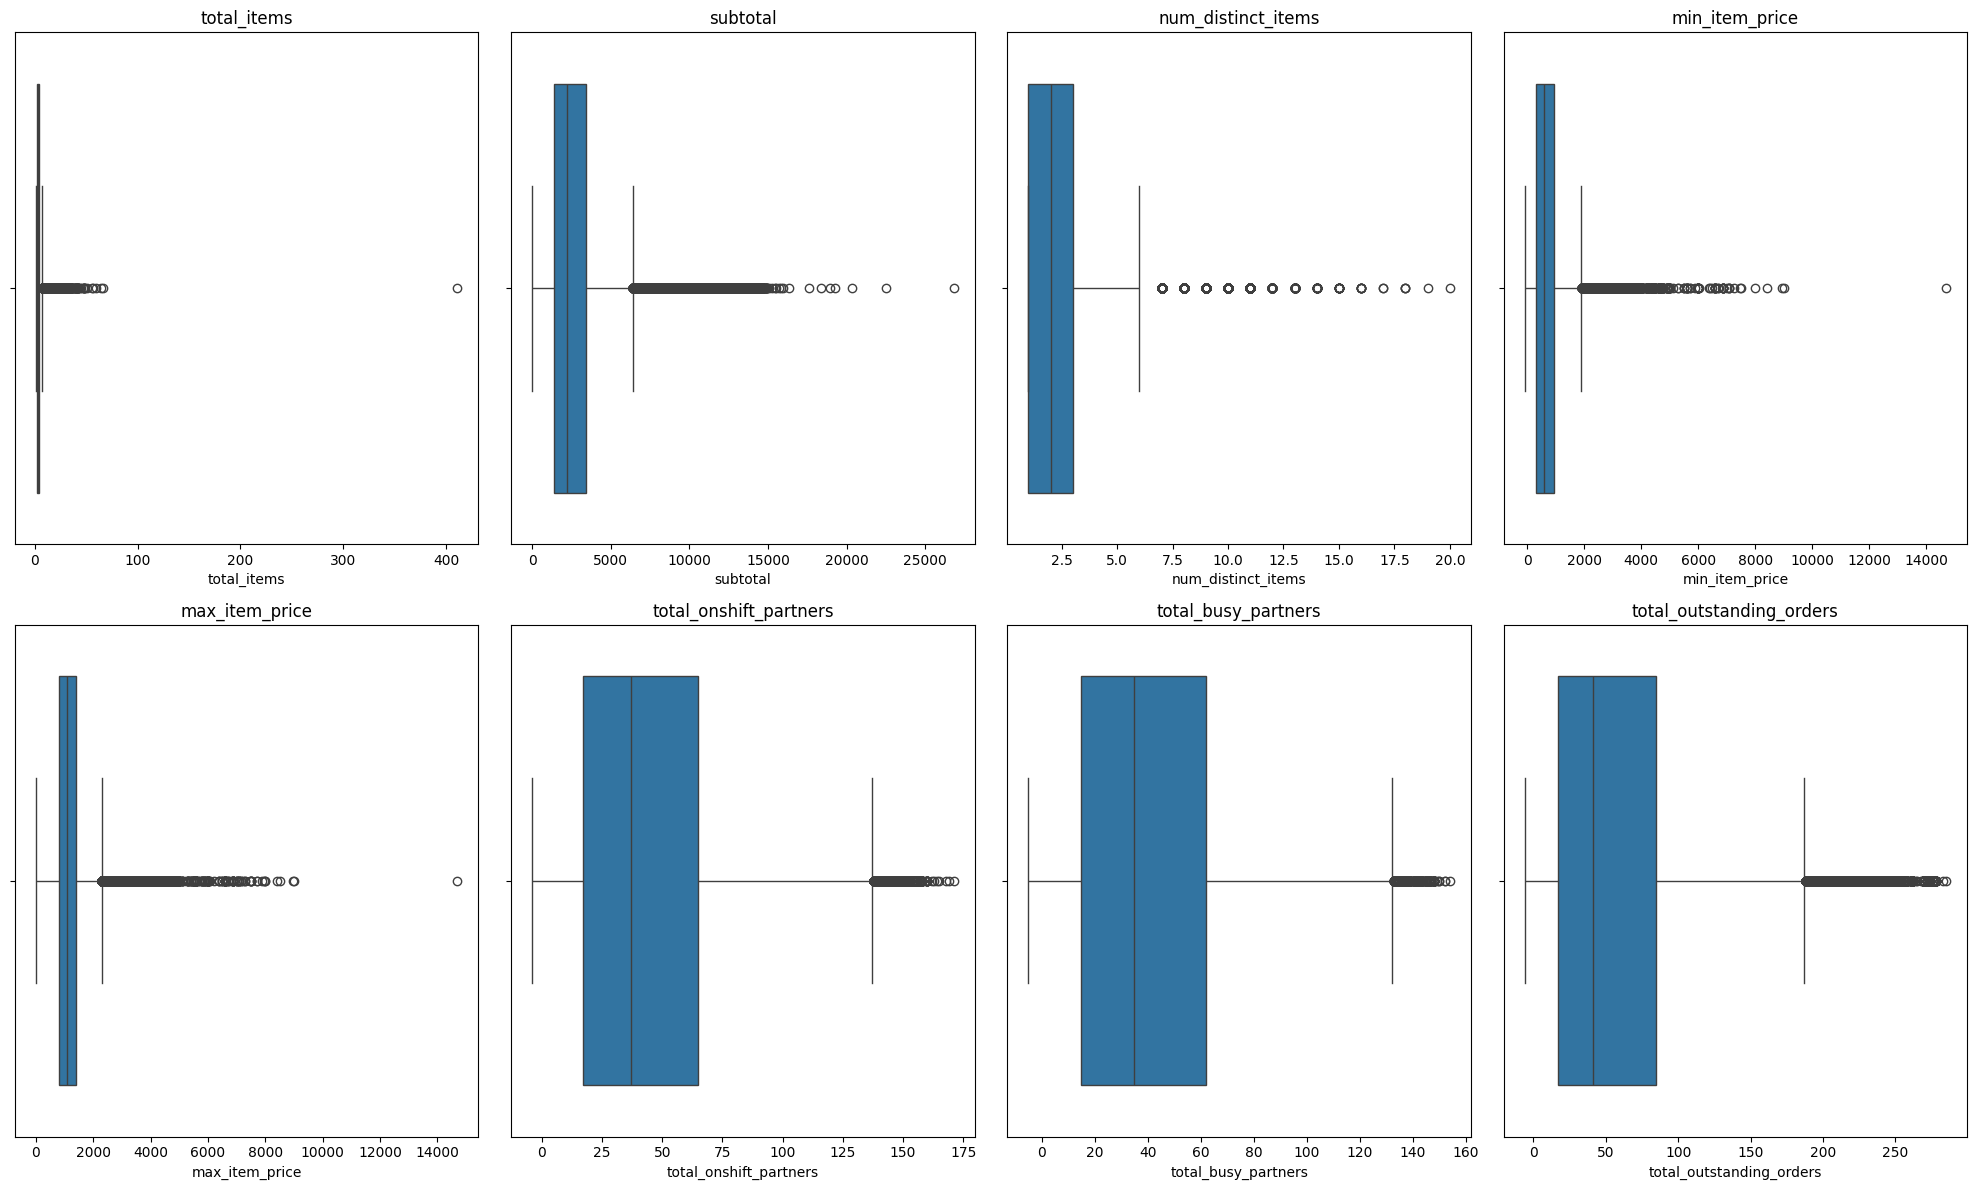

In [30]:
# check for outliers using boxplots

rows, cols = 2, 4  # 2 rows, 4 columns
fig, axis = plt.subplots(rows, cols, figsize=(20, 12))

index = 0
for row in range(rows):
    for col in range(cols):
        if index < len(num_cols):  # Check index bounds
            sns.boxplot(x=num_cols[index], data=df, ax=axis[row, col])
            axis[row, col].set_title(num_cols[index])
        else:
            axis[row, col].axis("off")  # Hide empty subplots if num_cols is smaller than the grid
        index += 1

plt.tight_layout()
plt.show()

In [31]:
for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()
    
    upper_limit = mean+3*std
    lower_limit = mean-3*std
    
    df = df[(df[col]<upper_limit) & (df[col]>lower_limit)]

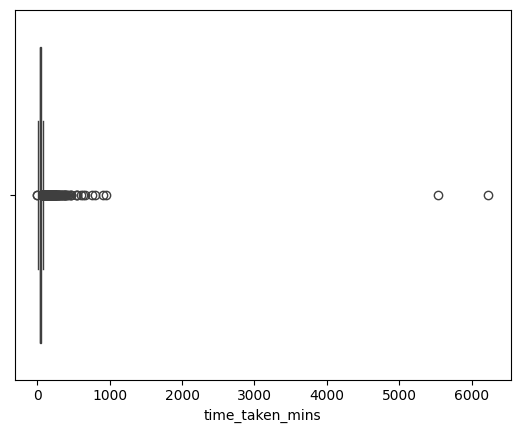

In [32]:
sns.boxplot(x=target, data=df)
plt.show()

In [33]:
# removing outliers in target variable
mean = df['time_taken_mins'].mean()
std = df['time_taken_mins'].std()

df= df[(df['time_taken_mins']<mean+3*std) & (df['time_taken_mins']>mean-3*std)]

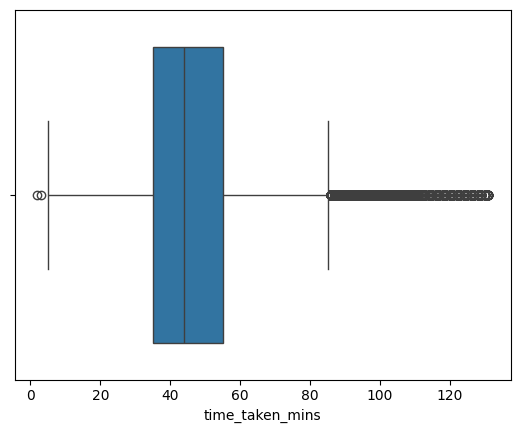

In [34]:
sns.boxplot(x=target, data=df)
plt.show()

### 2.3.3 One Hot Encoding:

In [35]:
from sklearn.preprocessing import OneHotEncoder

ohe_cols = ['market_id', 'order_protocol']

ohe = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
ohe_encoded = pd.DataFrame(ohe.fit_transform(df[ohe_cols]), columns=ohe.get_feature_names_out(ohe_cols))
df = df.drop(columns=ohe_cols).reset_index(drop=True)
df = pd.concat([df, ohe_encoded], axis=1)

In [36]:
from category_encoders.target_encoder import TargetEncoder

te_cols = ['store_id', 'store_primary_category', 'hour', 'day']

te = TargetEncoder()
df[te_cols] = te.fit_transform(df[te_cols], df['time_taken_mins'])

In [37]:
df.head()

,store_id,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,...,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,48.720274,46.900921,4,3441,4,557,1239,33.0,14.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,46.643418,43.470464,1,1900,1,1400,1400,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,46.643418,48.371881,4,4771,3,820,1604,8.0,6.0,18.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,50.162847,49.108872,1,1525,1,1525,1525,5.0,6.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.162847,49.108872,2,3620,2,1425,2195,5.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df.shape

(161184, 25)

# 3. Model Building

## 3.1 Regression with Classical ML Models

In [39]:
# Splitting data into train and test

y = df['time_taken_mins']
X = df.drop(['time_taken_mins'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.1.1 Random Forest:

In [40]:
# Train the Randomforest model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Predictions
y_pred = rf_regressor.predict(X_test)

# Calculation of errors
mse = mean_squared_error(y_test, y_pred)
print("mse : ",mse)

rmse = mse**0.5
print("rmse : ",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("mae : ",mae)

score = r2_score(y_test,y_pred)
print("r2_score :", score)

mse :  191.32907379301264
rmse :  13.832175309509804
mae :  10.41049115479551
r2_score : 0.33087533511702916


### 3.1.2 XGBoost:

In [41]:
# Ensure data is in the correct format
X_train = np.array(X_train)
y_train = np.array(y_train).ravel()
X_test = np.array(X_test)
y_test = np.array(y_test)

# Train the XGBoost model
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

# Predictions
y_pred = xgbr.predict(X_test)

# Calculation of errors
mse = mean_squared_error(y_test, y_pred)
print("mse : ",mse)

rmse = mse**0.5
print("rmse : ",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("mae : ",mae)

score = r2_score(y_test,y_pred)
print("r2_score :", score)

mse :  185.0725344144133
rmse :  13.604136665529838
mae :  10.174732599815474
r2_score : 0.35275598677147346


- XGBoost performs slightly better than Random Forest in all metrics, meaning it is the preferred model in this comparison.
- Both models have low R² scores (~0.33–0.35), meaning they are not explaining much of the variance in the data.The reasons could be :
    - Features may not be strong enough.
    - The dataset may have high noise.
    - The target variable may have a nonlinear pattern that these models are not capturing well.
- To Improve Performance, we will experiment with Neural Networks.

## 3.2 Regression with Neural Network

In [42]:
# Splitting data into training, validation and test data

y = df['time_taken_mins']
X = df.drop(['time_taken_mins'],axis=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [43]:
# Scalling the data to feed before neural network

# Separate scalers for X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale X
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

# Convert y to NumPy before reshaping
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_val_scaled = scaler_y.transform(np.array(y_val).reshape(-1, 1))
y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1, 1))

### 3.2.1 Base Neural Network Model:

In [44]:
# Building the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Linear activation (default) for regression
])

# Compiling the model
model.compile(loss='mse', optimizer=Adam(), metrics=['mse', 'mae'])

# Training the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=10, batch_size=512, verbose=1, validation_data=(X_val_scaled, y_val_scaled))

Epoch 1/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0416 - mae: 0.1487 - mse: 0.0416 - val_loss: 0.0138 - val_mae: 0.0881 - val_mse: 0.0138
Epoch 2/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0134 - mae: 0.0875 - mse: 0.0134 - val_loss: 0.0129 - val_mae: 0.0842 - val_mse: 0.0129
Epoch 3/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0129 - mae: 0.0857 - mse: 0.0129 - val_loss: 0.0127 - val_mae: 0.0835 - val_mse: 0.0127
Epoch 4/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - mae: 0.0845 - mse: 0.0126 - val_loss: 0.0124 - val_mae: 0.0834 - val_mse: 0.0124
Epoch 5/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mae: 0.0835 - mse: 0.0123 - val_loss: 0.0123 - val_mae: 0.0835 - val_mse: 0.0123
Epoch 6/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mae: 0.0837 - mse: 0.0123 - val_loss: 0.0122 - val_mae: 0.0834 - val_mse: 0.0122
Epoch 7/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mae: 0.0832 - mse: 0.0122 - val

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,677 (49.52 KB)

 Trainable params: 4,225 (16.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,452 (33.02 KB)

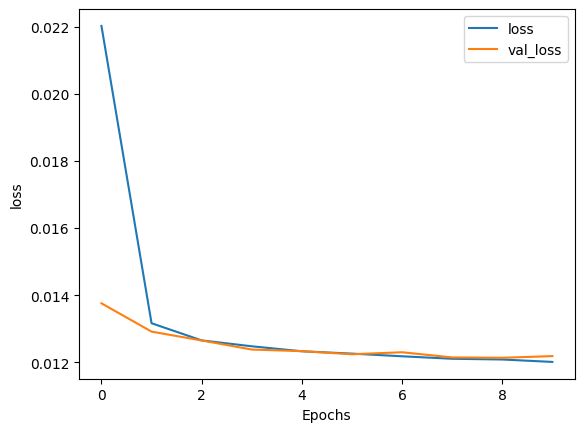

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.show()

- The training loss (blue line) drops sharply in the first few epochs, indicating that the model is learning quickly.
- The validation loss initially decreases but does not follow the same steady pattern as training loss. After a few epochs, validation loss starts fluctuating while training loss remains stable or decreases.

- This infers that **the model is overfitting – performing well on training data but generalizing poorly to validation data.**

In [47]:
# Predict in batches to save memory
y_pred_scaled = model.predict(X_test_scaled, batch_size=512)

# Reshape for inverse transform
y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Flatten y_pred to match y_test shape
y_pred = y_pred.ravel()

# Check for shape mismatches
print("Shapes -> y_test:", y_test.shape, "| y_pred:", y_pred.shape)

# Calculate errors
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print error metrics
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R2 Score: {r2:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Shapes -> y_test: (32237,) | y_pred: (32237,)
MSE: 200.6427
RMSE: 14.1648
MAE: 10.7763
MAPE: 25.7953
R2 Score: 0.2983


- High Error: RMSE (14.16), MAE (10.77), and MAPE (25.79%) indicate significant prediction errors.
- **Low R² (0.2983):** Model explains only 29.83% variance → likely underfitting.
- Let's do hyperparameter tuning.

### 3.2.2 Hyperparameter Tuning:

Hyperparameters Being Tuned:
- Number of units in each hidden layer (32 to 512)
- Number of layers (1 to 3 additional layers)
- Learning rate (0.0001 to 0.01)
- Batch size (16 to 512)
- Activation function (relu, leaky_relu, tanh)
- Use of Batch Normalization and Dropout 

In [55]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())  # Flatten input if necessary
    
    # Tune the number of layers (between 1 and 3 hidden layers)
    for i in range(hp.Int("num_layers", 1, 3)):  
        model.add(layers.Dense(
            # Tune units
            units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
            use_bias=False  # No bias needed when using Batch Normalization
        ))
        
        # Add Batch Normalization
        model.add(layers.BatchNormalization())
        
        # Tune activation function
        activation = hp.Choice("activation", ["relu", "leaky_relu", "tanh"])
        if activation == "leaky_relu":
            model.add(layers.LeakyReLU(alpha=0.01))  # Default alpha = 0.01
        else:
            model.add(layers.Activation(activation))
        
        # Add Dropout 
        if hp.Boolean("dropout"):
            model.add(layers.Dropout(rate=0.25))  
    
    # Output layer for regression (1 neuron, no activation)
    model.add(layers.Dense(1, activation="linear"))  
    
    # Tune batch_size
    hp_batch_size = hp.Int("batch_size", min_value=16, max_value=512, step=16)

    # Tune learning rate
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    # Compile model for regression
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mse", 
        metrics=["mse", "mae"]
    )
    
    return model

In [56]:
# Initialize Keras Tuner with Random Search

tuner = kt.RandomSearch(
    build_model,
    objective='val_mse',  # Minimize validation MSE
    max_trials=10,  # Number of different models to test
    executions_per_trial=1,  # Train each model once
    directory='nn_hyperparameter_tuning',
    project_name='nn_regression_model_tuning'
)

Reloading Tuner from nn_hyperparameter_tuning\nn_regression_model_tuning\tuner0.json


In [57]:
# Perform hyperparameter search

tuner.search(X_train_scaled, y_train_scaled, 
             epochs=20,
             validation_data=(X_val_scaled, y_val_scaled), 
             verbose=1)

In [58]:
# Get the best hyperparameters

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(f"Number of Layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get("num_layers")):
    print(f"Units in Layer {i+1}: {best_hps.get(f'units_{i}')}")
print(f"Activation Function: {best_hps.get('activation')}")
print(f"Dropout Used: {best_hps.get('dropout')}")
print(f"Batch Size: {best_hps.get('batch_size')}")
print(f"Learning Rate: {best_hps.get('lr')}")

Best Hyperparameters:
Number of Layers: 2
Units in Layer 1: 256
Units in Layer 2: 192
Activation Function: tanh
Dropout Used: False
Batch Size: 480
Learning Rate: 0.0027215464940055565


In [59]:
# Build the best model

best_model = tuner.hypermodel.build(best_hps)

In [60]:
# Train the best model

history = best_model.fit(X_train_scaled, y_train_scaled, 
                         epochs=30,
                         batch_size=best_hps.get('batch_size'), 
                         validation_data=(X_val_scaled, y_val_scaled),
                         verbose=1)

Epoch 1/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1574 - mae: 0.2369 - mse: 0.1574 - val_loss: 0.0143 - val_mae: 0.0924 - val_mse: 0.0143
Epoch 2/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0147 - mae: 0.0925 - mse: 0.0147 - val_loss: 0.0150 - val_mae: 0.0928 - val_mse: 0.0150
Epoch 3/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0143 - mae: 0.0912 - mse: 0.0143 - val_loss: 0.0131 - val_mae: 0.0872 - val_mse: 0.0131
Epoch 4/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0135 - mae: 0.0885 - mse: 0.0135 - val_loss: 0.0134 - val_mae: 0.0884 - val_mse: 0.0134
Epoch 5/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0135 - mae: 0.0884 - mse: 0.0135 - val_loss: 0.0137 - val_mae: 0.0881 - val_mse: 0.0137
Epoch 6/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0135 - mae: 0.0885 - mse: 0.0135 - val_loss: 0.0136 - val_mae: 0.0891 - val_mse: 0.0136
Epoch 7/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0134 - mae: 0.0877 - mse: 0.013

In [61]:
# Evaluate the best model
y_pred_scaled = best_model.predict(X_test_scaled)

# Reshape for inverse transform
y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Flatten y_pred to match y_test shape
y_pred = y_pred.ravel()

# Calculate errors
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print error metrics
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R2 Score: {r2:.4f}")

1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
MSE: 197.0664
RMSE: 14.0380
MAE: 10.7131
MAPE: 25.5009
R2 Score: 0.3108


- Slight Improvement: Optimized model shows lower MSE (197.07 vs. 200.64) and higher R² (0.3108 vs. 0.2983), but the gain is marginal.
- Error Reduction: RMSE (14.0380 vs. 14.1648) and MAPE (25.50% vs. 25.79%) show minor improvements.
- MAE Increased: Slightly worse MAE (10.7131 vs. 10.7763) suggests inconsistency in individual predictions.
- The model improved slightly but still underperforms. Further optimization is needed for significant gains. 

## Summary:

- Among all models, **XGBoost achieved the lowest MSE (185.07) and highest R² (0.3528)**, making it the most accurate model for this regression task.
- While **Random Forest performed decently (MSE: 191.39, R²: 0.3307)**, it slightly lagged behind XGBoost.
- Despite hyperparameter tuning, the **Neural Network (MSE: 197.07, R²: 0.3108)** didn't outperform XGBoost or Random Forest significantly. The gain over the base model was minor, suggesting possible limitations in model complexity or feature representation.
- **Further optimization of Neural Networks (e.g., better architecture, feature engineering, more data) may be needed to make it competitive.**

# 4. Some Key Concepts

#### 1. Defining the Problem Statements and Applications:
Defining a clear problem statement helps in structuring the approach to data analysis and model building. The problem statement can be applied in predictive modeling, anomaly detection, and trend analysis across industries like finance, healthcare, and e-commerce. Modifications of the problem statement allow for adaptations to different datasets and business requirements.

#### 2. Three Pandas datetime Functions:
- pd.to_datetime(): Converts strings or other formats into a datetime object.
- .dt.year / .dt.month / .dt.day: Extracts specific date components like year, month, or day.
- .strftime(): Formats datetime objects into readable strings based on a specified format.

#### 3. Short Note on datetime, timedelta, and Period:
- datetime: Represents a specific point in time (e.g., "2024-03-20 14:30:00").
- timedelta: Represents a duration or difference between two datetime values (e.g., "5 days, 3 hours").
- Period: Represents a time span, such as a month or year (e.g., "March 2024" as a single period).

#### 4. Need to Check for Outliers:
Outliers can skew statistical measures, distort model predictions, and lead to inaccurate conclusions. Detecting and handling them ensures data quality and improves model performance.

#### 5. Three Outlier Removal Methods:
- **Z-score method:** Removes values that fall beyond a threshold (e.g., 3 standard deviations from the mean).
- **IQR (Interquartile Range) method:** Removes values outside the lower and upper bounds (Q1 - 1.5*IQR, Q3 + 1.5*IQR).
- **Isolation Forest:** A machine learning model that identifies anomalies based on feature separation.

#### 6. Classical Machine Learning Methods for This Problem:
For this problem, I have used Random Forest Regressor and XGBoost Regressor, both of which are ensemble learning techniques known for their robustness and accuracy in regression tasks.
- Random Forest Regressor:
    - It is an ensemble of decision trees that reduces overfitting by averaging multiple predictions.
    - It is highly interpretable and handles missing values and feature importance well.
    - Works effectively on both small and large datasets.
- XGBoost Regressor:
    - A gradient boosting algorithm that improves prediction accuracy by iteratively correcting errors.
    - Faster and more efficient than traditional boosting techniques due to its parallel processing and regularization capabilities.
    - Works well on structured/tabular data and handles complex relationships effectively.

#### 7. Need of Scaling for Neural Networks:
Scaling ensures that all input features contribute equally to the learning process, prevents dominance by large numerical values, and speeds up convergence during training.

#### 8. Explaination of Choice of Optimizer:
I have chosen **Adam (Adaptive Moment Estimation)** as my optimizer because it combines the advantages of both momentum-based gradient descent and adaptive learning rates. Adam adapts the learning rate for each parameter individually, making it effective for handling sparse gradients and noisy data. It is computationally efficient, requires little tuning, and generally performs well in deep learning.These properties make it a preferred choice for training neural networks.

#### 9. Which Activation Function Did You Use and Why?
- ReLU in Base Model: Used for its computational efficiency and ability to avoid vanishing gradients, making it a strong default choice.
- Tanh in Final Model: Selected by hyperparameter tuning, likely due to its ability to handle negative values and smooth gradient flow.

#### 10. Neural Network Perform Well on a Large Dataset:
Larger datasets allow neural networks to learn complex patterns, reduce overfitting, improve generalization, and utilize deep architectures effectively. Additionally, deep learning models benefit from big data due to their capacity to extract hierarchical features.